# Connect to your Driver

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
cd /content/drive/MyDrive/GG Colab/VGG16

/content/drive/MyDrive/GG Colab/VGG16


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [74]:
data = pd.read_csv('/content/drive/MyDrive/GG Colab/VGG16/CO2 dataset.csv')
data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [75]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data

,Year,CO2
0,1800-01-01,0.00568
1,1801-01-01,0.00561
2,1802-01-01,0.00555
3,1803-01-01,0.00548
4,1804-01-01,0.00542
...,...,...
210,2010-01-01,15.60000
211,2011-01-01,15.60000
212,2012-01-01,14.80000
213,2013-01-01,14.70000


In [100]:
def getValues(data, windowSize=5, targetSize=3):
  i = 1
  while i < windowSize:
    data[f'CO2_{i}'] = data['CO2'].shift(-i)
    i += 1
  i = 0
  while i < targetSize:
    data[f'target{i}'] = data['CO2'].shift(-i-windowSize)
    i += 1
  return data


In [108]:
windowSize = 5




targetSize = 3
data = getValues(data, windowSize, targetSize)
data = data.dropna(axis=0)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     187 non-null    datetime64[ns]
 1   CO2      187 non-null    float64       
 2   CO2_1    187 non-null    float64       
 3   CO2_2    187 non-null    float64       
 4   CO2_3    187 non-null    float64       
 5   CO2_4    187 non-null    float64       
 6   target0  187 non-null    float64       
 7   target1  187 non-null    float64       
 8   target2  187 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 14.6 KB


In [102]:
X = data.drop(['Year'] + [f'target{i}' for i in range(targetSize)], axis=1)
y = data[[f'target{i}' for i in range(targetSize)]]

In [103]:
X, y

(          CO2     CO2_1     CO2_2     CO2_3     CO2_4
 0     0.00568   0.00561   0.00555   0.00548   0.00542
 1     0.00561   0.00555   0.00548   0.00542   0.00536
 2     0.00555   0.00548   0.00542   0.00536   0.00529
 3     0.00548   0.00542   0.00536   0.00529   0.00523
 4     0.00542   0.00536   0.00529   0.00523   0.00517
 ..        ...       ...       ...       ...       ...
 189  17.00000  15.70000  15.20000  15.50000  15.50000
 190  15.70000  15.20000  15.50000  15.50000  15.70000
 191  15.20000  15.50000  15.50000  15.70000  15.90000
 192  15.50000  15.50000  15.70000  15.90000  16.20000
 193  15.50000  15.70000  15.90000  16.20000  16.60000
 
 [194 rows x 5 columns],
       target0   target1   target2
 0     0.00536   0.00529   0.00523
 1     0.00529   0.00523   0.00517
 2     0.00523   0.00517   0.00511
 3     0.00517   0.00511   0.00504
 4     0.00511   0.00504   0.00497
 ..        ...       ...       ...
 189  15.70000  15.90000  16.20000
 190  15.90000  16.20000  16.6000

In [104]:
numberSample = len(X)
trainSize = 0.8
Xtrain, Xtest = X[:int(numberSample*trainSize)], X[int(numberSample*trainSize):]
ytrain, ytest = y[:int(numberSample*trainSize)], y[int(numberSample*trainSize):]

In [105]:
Models = [LinearRegression() for _ in range(targetSize)]
for i, Model in enumerate(Models):
  Model.fit(Xtrain, ytrain[f'target{i}'])
r2 = []
MSE = []
MAE = []
for i, Model in enumerate(Models):
  yPred = Model.predict(Xtest)
  r2.append(r2_score(ytest[f'target{i}'], yPred))
  MSE.append(mean_squared_error(ytest[f'target{i}'], yPred))
  MAE.append(mean_absolute_error(ytest[f'target{i}'], yPred))

for i in range(targetSize):
  print(f'R2 Score{i}: {r2[i]}',f'MSE{i}: {MSE[i]}', f'MAE{i}: {MAE[i]}')
  print()



R2 Score0: 0.9118543995776484 MSE0: 0.3672710169971314 MAE0: 0.4600218953748224

R2 Score1: 0.7631552583098891 MSE1: 0.8584243795560437 MAE1: 0.7525329044643215

R2 Score2: 0.5626541591335801 MSE2: 1.3184266248898924 MAE2: 0.9632545090483524



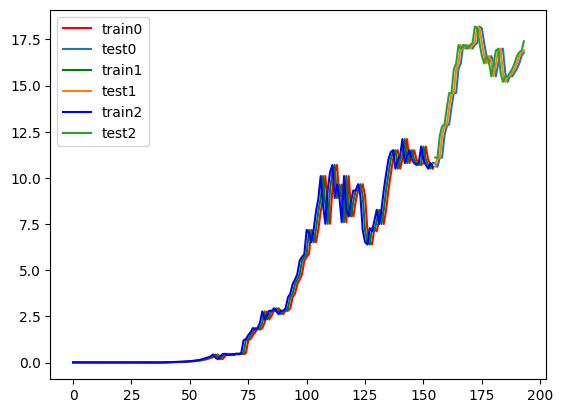

In [111]:
fig, ax = plt.subplots()
color = ['r', 'g', 'b']
for i in range(targetSize):
  ax.plot(Xtrain.index, ytrain[f'target{i}'], label=f'train{i}', color=color[i])
  ax.plot(Xtest.index, ytest[f'target{i}'], label=f'test{i}')
ax.legend()
plt.show()

# Vhoc lag rooif, ko lamf nuawx:))))))))))))))))